In [10]:
import numpy as np


#3.2.2阶跃函数的实现
#简单的
"""def step_function(x):
    if x > 0:
        return 1
    else:
        return"""
#支持Numpy数组的实现
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [15]:
def step_function(x):
    y = x > 0
    return y.astype(np.int32)#这里书里面有错误
x = np.array([-1.0, 1.0, 2.0])
print(x)
print(step_function(x))

[-1.  1.  2.]
[0 1 1]
[0 1 1]


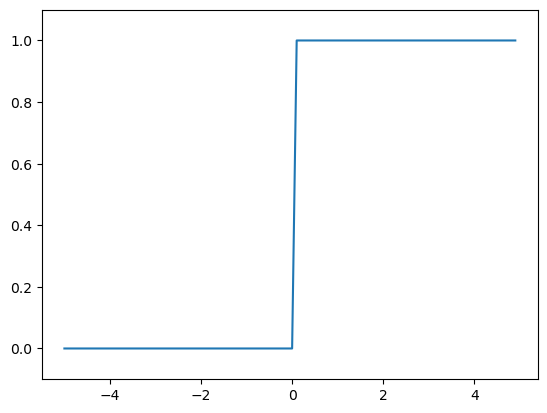

In [16]:
#3.2.3 阶跃函数的图形
import numpy as np
import matplotlib.pyplot as plt
def step_function(x):
    return np.array(x>0, dtype=np.int32)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

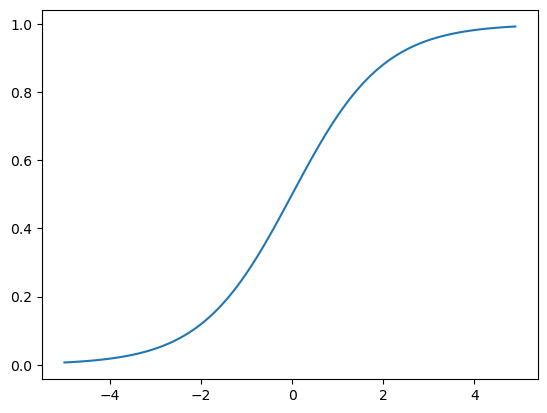

In [17]:
#3.2.4 sigmoid 函数的实现
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)

### sigmoid 的平滑性对于神经网络来说有着重要的意义
激活函数必须使用非线性函数

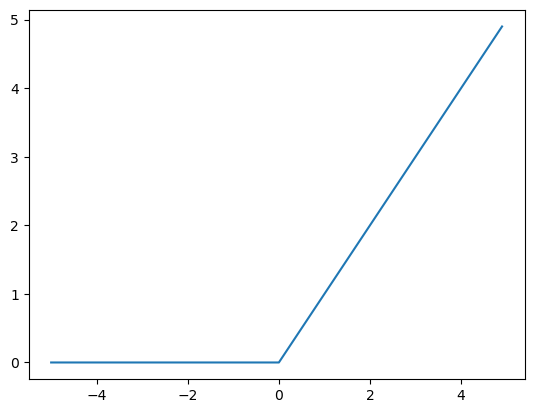

In [18]:
#3.2.7 ReLU函数
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)

In [21]:
#3.3多维数组的运算
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])#表示第一个维度有四个元素 可以直观的和shape元组的内容对应上

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[1])

[1 2 3 4]
1
(4,)
4
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
2


In [23]:
#3.3.3 神经网络的内积
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [33]:
#3,4 三层神经网络的实现
# 接下来我们实现输入到输出的前向处理
X = np.array([1.0, 0.5])
W1 = np. array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

[0.4  0.65 0.9 ]
[0.59868766 0.65701046 0.7109495 ]


In [34]:
#接下来实现从第一层到第二层的传导
W2 = np.array([[0.1, 0.2], [0.4, 0.5], [0.6, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.70040825 0.74551104]


In [35]:
#第三层同理
W3 = np.array([[0.1, 0.3], [0.4, 0.5]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Z3 = sigmoid(A3)
print(Z3)

[0.61496834 0.68630006]


In [39]:
#3.4.3代码实现小结
def init__network():
    network = {}
    network['W1'] = np.array([[1, 2, 3], [4, 5, 6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[1, 2], [4, 5], [6, 7]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[1, 2], [4, 5]])
    network['B3'] = np.array([0.1, 0.2])
    return network
def forward(network, x):
    W1 = network['W1']
    B1 = network['B1']
    W2 = network['W2']
    B2 = network['B2']
    W3 = network['W3']
    B3 = network['B3']
    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = a3
    return y

network = init__network()
x = np.array([1, 2])
y = forward(network, x)
print(y)


[5.09998216 7.19996637]


In [ ]:
#3.5 输出层的设计
# 分类问题是属于哪一个类别的问题 而回归问题是预测一个连续的数值的问题


##### 分类问题使用的softMax函数 softmax就是一个占比？？？？

In [44]:
#softmax函数的实现

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print("exp_a = ", exp_a)
sum_exp_a = np.sum(exp_a)
print("sum_exp_a = ", sum_exp_a)
y = exp_a / sum_exp_a
print("y = ", y)
#定义成一个函数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

exp_a =  [ 1.34985881 18.17414537 54.59815003]
sum_exp_a =  74.1221542101633
y =  [0.01821127 0.24519181 0.73659691]


In [ ]:
#softmax 函数的改进 感觉像是对数据进行处理进行归一化的步骤
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [45]:
#softmax 函数的和都为1 所以可以代表概率
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print("y = ", y)
print(np.sum(y))

y =  [0.01821127 0.24519181 0.73659691]
1.0


In [73]:
import numpy as np
import struct

def load_images(path):
    with open(path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num, rows, cols)

def load_labels(path):
    with open(path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

train_images = load_images("data/train-images-idx3-ubyte")
train_labels = load_labels("data/train-labels-idx1-ubyte")
test_images = load_images("data/t10k-images-idx3-ubyte")
test_labels = load_labels("data/t10k-labels-idx1-ubyte")

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [74]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
print(train_images_flat.shape, train_labels.shape)
test_images_flat = test_images.reshape(test_images.shape[0], -1)
print(test_images_flat.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [75]:
#试着显示一下这些数据
import sys, os
sys.path.append(os.pardir)
import numpy as np
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
img = train_images[0]
label = train_labels[0]
print(label)

img_show(img)

5


#### 元组是 Python 中的一种 数据结构，用来存放多个元素。

和列表（list）类似，但有两个主要区别：

元组用圆括号 () 表示，列表用方括号 [] 表示。

元组不可修改（immutable），创建后不能增删改元素，列表可以

In [76]:
#3.6.2神经网络的推理处理
#接下来对这个数据集实现神经网络的推理处理，输入层有784个神经元 输出层有10个神经元
#两个隐藏层 一层100个 一层50 个
def get_data():
 # 归一化：把 uint8 -> float32 并除以 255
    x_train = train_images_flat.astype('float32') / 255.0
    t_train = train_labels

    x_test = test_images_flat.astype('float32') / 255.0
    t_test = test_labels
    return (x_train, t_train), (x_test, t_test)

